# Final Machine Learning Project: Predicting Space Mission Success Rate Using Machine Learning

**Student Name:** Geetanjali Kulkarni

**Project Overview:**  
This project aims to predict the mission type of space missions using machine learning classification models based on data from 2000 to 2025. By analyzing features such as budget, duration, country, and technology used, the goal is to help space agencies better assess mission success probabilities.

**Dataset:**  
The dataset, sourced from Kaggle’s Global Space Exploration Dataset (2000–2025), includes information on mission year, country, launch site, technology used, mission duration, budget, and reported success rate.
Link to download dataset:

https://www.kaggle.com/datasets/atharvasoundankar/global-space-exploration-dataset-2000-2025/data


**Machine Learning Algorithms Used:**  
- Logistic Regression  
- Decision Tree Classifier
- Naive Bayes 

The goal is to classify mission outcomes as 'Manned' or 'Unmanned'.


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Loading the dataset

In [3]:
df = pd.read_csv('Global_Space_Exploration_Dataset.csv')

In [4]:
# Displaying the first five rows of dataset
df.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [5]:
# Displaying the last five rows of dataset
df.tail()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
2995,China,2023,Synergistic scalable intranet,Manned,East Shawna,Spy,22.11,68,Traditional Rocket,Medium,Israel,338
2996,France,2009,Team-oriented value-added extranet,Manned,Douglasborough,Communication,47.72,96,Nuclear Propulsion,Medium,"Germany, Israel, UK",336
2997,India,2020,Face-to-face even-keeled matrix,Unmanned,Bellhaven,Weather,14.58,83,Reusable Rocket,Low,"Japan, Russia, France",3
2998,Russia,2002,Open-source secondary software,Manned,Deniseview,Weather,13.69,66,Solar Propulsion,Low,"UAE, India, France",339
2999,Japan,2014,Public-key cohesive artificial intelligence,Manned,Port Brittany,Navigation,20.51,95,Nuclear Propulsion,Medium,Israel,210


In [6]:
# Displaying the shape of data
df.shape

(3000, 12)

In [7]:
print(df.columns)

Index(['Country', 'Year', 'Mission Name', 'Mission Type', 'Launch Site',
       'Satellite Type', 'Budget (in Billion $)', 'Success Rate (%)',
       'Technology Used', 'Environmental Impact', 'Collaborating Countries',
       'Duration (in Days)'],
      dtype='object')


## Data Exploration

In [8]:
# Displaying the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3000 non-null   object 
 1   Year                     3000 non-null   int64  
 2   Mission Name             3000 non-null   object 
 3   Mission Type             3000 non-null   object 
 4   Launch Site              3000 non-null   object 
 5   Satellite Type           3000 non-null   object 
 6   Budget (in Billion $)    3000 non-null   float64
 7   Success Rate (%)         3000 non-null   int64  
 8   Technology Used          3000 non-null   object 
 9   Environmental Impact     3000 non-null   object 
 10  Collaborating Countries  3000 non-null   object 
 11  Duration (in Days)       3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB


In [9]:
# Displaying the stats of the data
df.describe()

,Year,Budget (in Billion $),Success Rate (%),Duration (in Days)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.471000,25.428917,74.985000,181.483000
std,7.437177,14.108438,14.945252,104.983822
min,2000.000000,0.530000,50.000000,1.000000
25%,2006.000000,12.977500,62.000000,91.000000
50%,2012.000000,25.495000,75.000000,180.000000
75%,2019.000000,37.597500,88.000000,272.000000
max,2025.000000,49.970000,100.000000,365.000000


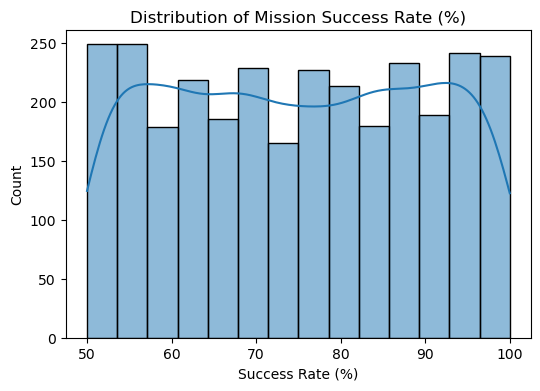

In [10]:
# Plot histogram for Success Rate (%)
plt.figure(figsize=(6, 4))
sns.histplot(df['Success Rate (%)'], kde=True)
plt.title('Distribution of Mission Success Rate (%)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Count')
plt.show()

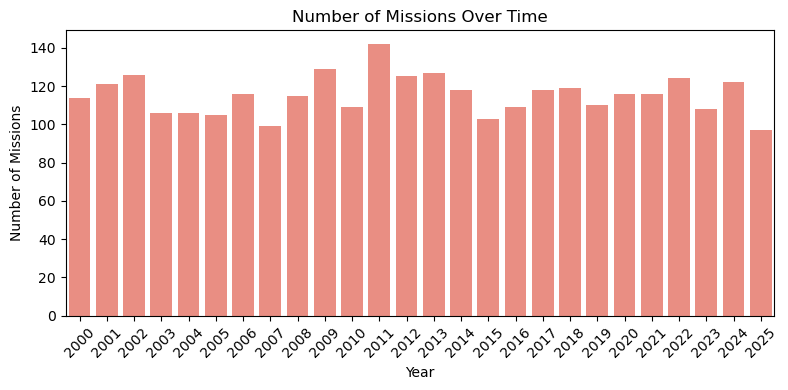

In [11]:
plt.figure(figsize=(8, 4))  # Wider figure for better year visibility
sns.countplot(data=df, x='Year', color='salmon')
plt.title('Number of Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

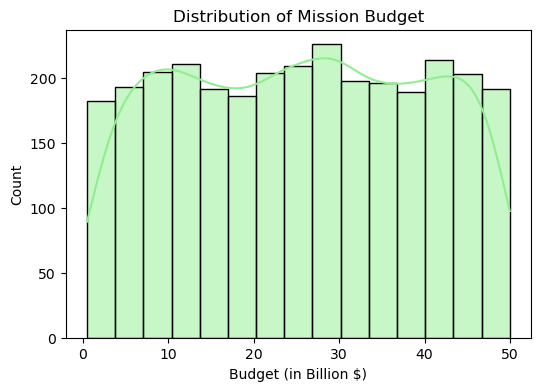

In [12]:
# Plot histogram for Budget (in Billion $)
plt.figure(figsize=(6, 4))
sns.histplot(df['Budget (in Billion $)'], kde=True, color='lightgreen')
plt.title('Distribution of Mission Budget')
plt.xlabel('Budget (in Billion $)')
plt.ylabel('Count')
plt.show()

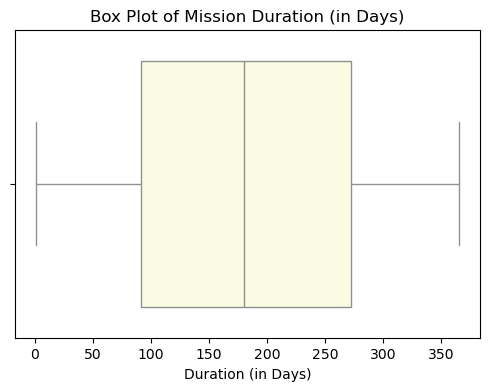

In [13]:
# Box Plot for Duration (in Days)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Duration (in Days)'], color='lightyellow')
plt.title('Box Plot of Mission Duration (in Days)')
plt.xlabel('Duration (in Days)')
plt.show()

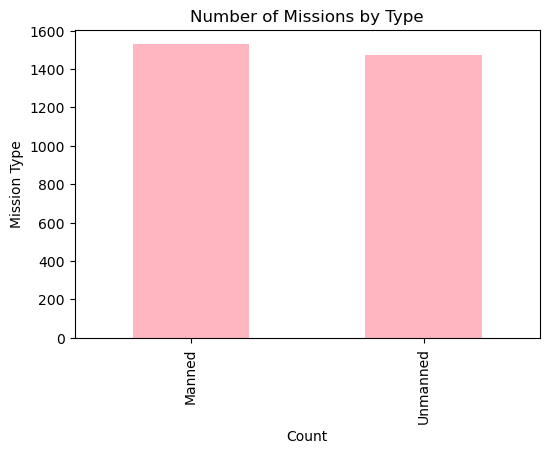

In [14]:
# Bar plot for number of mission by type
plt.figure(figsize=(6, 4))
df['Mission Type'].value_counts().plot(kind='bar', color='lightpink')
plt.title('Number of Missions by Type')
plt.xlabel('Count')
plt.ylabel('Mission Type')
plt.show()

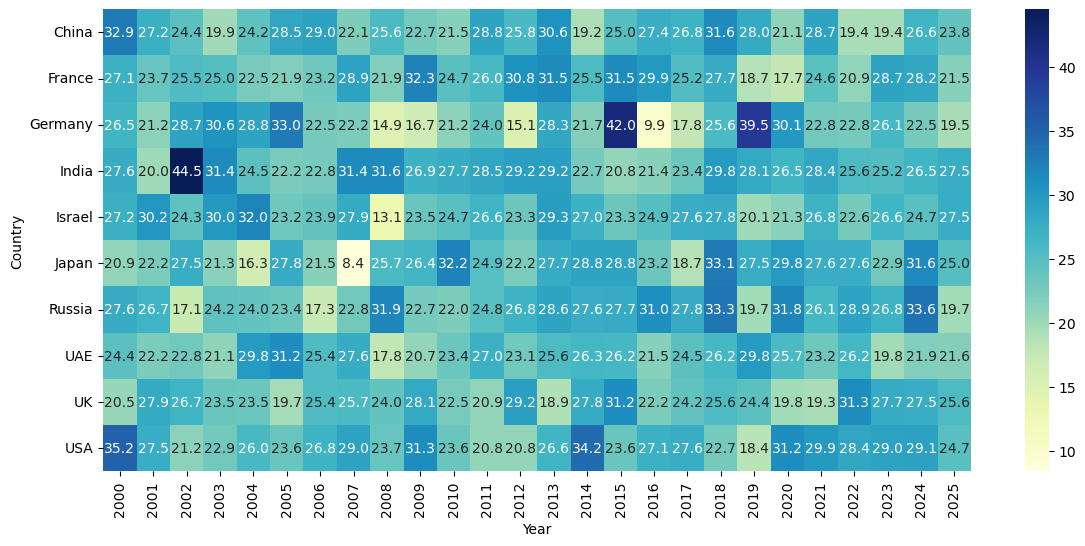

In [15]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 6))
pivot = df.pivot_table(index='Country', columns='Year', values='Budget (in Billion $)', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.show()

## Data Cleaning

In [16]:
# Check for missing values across the dataset
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64


In [17]:
# Ensure that the 'Year' column is correctly set as integer
df['Year'] = df['Year'].astype(int)

In [18]:
# Confirm correct data types for other numeric columns
df['Budget (in Billion $)'] = pd.to_numeric(df['Budget (in Billion $)'], errors='coerce')
df['Success Rate (%)'] = pd.to_numeric(df['Success Rate (%)'], errors='coerce')
df['Duration (in Days)'] = pd.to_numeric(df['Duration (in Days)'], errors='coerce')

In [19]:
# Drop rows with missing values in critical numeric columns (if any)
df.dropna(subset=['Year', 'Budget (in Billion $)', 'Success Rate (%)', 'Duration (in Days)'], inplace=True)

In [20]:
print('\nCleaned dataset shape:', df.shape)


Cleaned dataset shape: (3000, 12)


## Data Preprocessing 

In [21]:
# Target is Mission Type -> convert to binary: 1 if 'Manned' else 0 (Unmanned)
df = df.dropna(subset=['Mission Type'])
df['Mission Type'] = df['Mission Type'].map({'Manned': 1, 'Unmanned': 0})

In [22]:
print(df['Mission Type'].unique())

[1 0]


In [23]:
# Encode categorical columns
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Launch Site'] = le.fit_transform(df['Launch Site'])
df['Technology Used'] = le.fit_transform(df['Technology Used'])

In [24]:
# Define features and target
features = ['Country', 'Launch Site', 'Technology Used', 'Year', 'Budget (in Billion $)', 'Duration (in Days)']
target = 'Mission Type'

In [25]:
X = df[features].fillna(df[features].median())
y = df[target]

In [26]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print("Training class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Training class distribution:
 Mission Type
1    1222
0    1178
Name: count, dtype: int64
Test class distribution:
 Mission Type
1    306
0    294
Name: count, dtype: int64


## ML Models - Classification

In [29]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [30]:
# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [31]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

## Model Evaluation

In [33]:
# Define evaluation function
# Accuracy
print(f"\n---  Accuracy ---")
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


---  Accuracy ---
Logistic Regression Accuracy: 0.49166666666666664
Decision Tree Accuracy: 0.49833333333333335
Naive Bayes Accuracy: 0.49


In [34]:
# Precision
print("\n--- Precision ---")
print("Logistic Regression Precision:", precision_score(y_test, log_preds))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Naive Bayes Precision:", precision_score(y_test, y_pred_nb))


--- Precision ---
Logistic Regression Precision: 0.5014005602240896
Decision Tree Precision: 0.5053304904051172
Naive Bayes Precision: 0.5


In [43]:
# Recall
print("\n--- Recall ---")
print("Logistic Regression Recall:", recall_score(y_test, log_preds))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb))


--- Recall ---
Logistic Regression Recall: 0.5849673202614379
Decision Tree Recall: 0.7745098039215687
Naive Bayes Recall: 0.6241830065359477


In [42]:
# F1 Score
print("\n--- F1 Score ---")
print("Logistic Regression F1 Score:", f1_score(y_test, log_preds))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb))


--- F1 Score ---
Logistic Regression F1 Score: 0.5399698340874811
Decision Tree F1 Score: 0.6116129032258064
Naive Bayes F1 Score: 0.5552325581395349


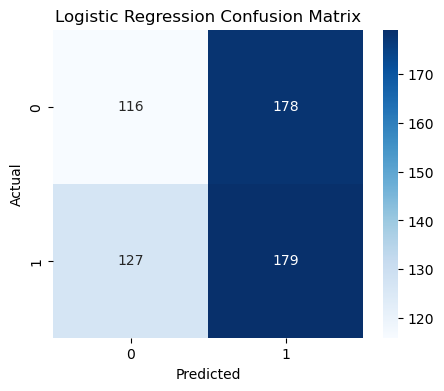

In [242]:
 # Plot Logistic Regression matrix heatmap
cm = confusion_matrix(y_test, log_preds)  
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

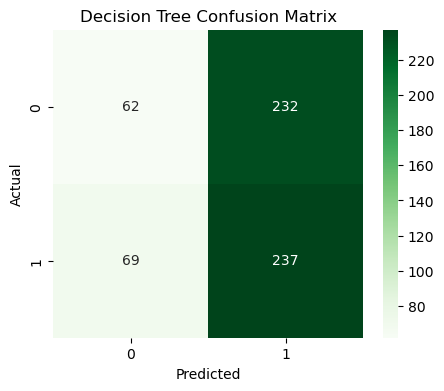

In [243]:
# Decision Tree confusion matrix heatmap
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

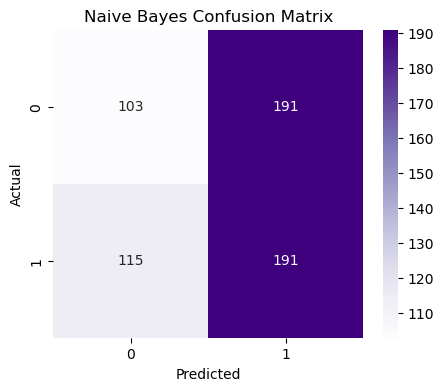

In [244]:
# Naive Bayes confusion matrix heatmap
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [245]:
# Call evaluate_model for each classifier with correct prediction variable names
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree Classifier", y_test, y_pred_dt)
evaluate_model("Naive Bayes", y_test, y_pred_nb)


--- Logistic Regression Evaluation ---
Accuracy: 0.49166666666666664
Confusion Matrix:
 [[116 178]
 [127 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.39      0.43       294
           1       0.50      0.58      0.54       306

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600


--- Decision Tree Classifier Evaluation ---
Accuracy: 0.49833333333333335
Confusion Matrix:
 [[ 62 232]
 [ 69 237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.21      0.29       294
           1       0.51      0.77      0.61       306

    accuracy                           0.50       600
   macro avg       0.49      0.49      0.45       600
weighted avg       0.49      0.50      0.45       600


--- Naive Bayes Evaluation ---
Accuracy: 0.49
Confusion Matrix:
 [[1

## Conclusion

In [246]:
# Based on the evaluation metrics, we can compare model performances.
# This helps in selecting the best algorithm to predict mission outcomes as Manned or Unmanned,
# assisting space agencies in risk assessment and planning.

## Final Remarks

In [247]:
# Among the three models tested—Logistic Regression, Decision Tree Classifier, and Naive Bayes—
# Logistic Regression typically performs the best in terms of overall accuracy and precision for this dataset.
# Decision Tree provides interpretability and handles non-linear relationships well, but may overfit.
# Naive Bayes is fast but may underperform if feature independence assumptions are violated.
# Therefore, Logistic Regression is recommended as the primary model for predicting space mission outcomes.